In [1]:
library(tidyverse)
library(ggpubr)
library(rstatix)
library(car)
library(broom)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘rstatix’


The following object is masked from ‘package:stats’:

    filter


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




In [2]:
iris2 = iris %>%
select(Sepal.Length, Petal.Length, Species) %>%
add_column((id = 1:nrow(iris)))

In [3]:
head(iris2)

,Sepal.Length,Petal.Length,Species,(id = 1:nrow(iris))
,<dbl>,<dbl>,<fct>,<int>
1,5.1,1.4,setosa,1
2,4.9,1.4,setosa,2
3,4.7,1.3,setosa,3
4,4.6,1.5,setosa,4
5,5.0,1.4,setosa,5
6,5.4,1.7,setosa,6


In [4]:
dim(iris2)

[1] 150   4

In [5]:
summary(iris2)

  Sepal.Length    Petal.Length         Species   (id = 1:nrow(iris))
 Min.   :4.300   Min.   :1.000   setosa    :50   Min.   :  1.00     
 1st Qu.:5.100   1st Qu.:1.600   versicolor:50   1st Qu.: 38.25     
 Median :5.800   Median :4.350   virginica :50   Median : 75.50     
 Mean   :5.843   Mean   :3.758                   Mean   : 75.50     
 3rd Qu.:6.400   3rd Qu.:5.100                   3rd Qu.:112.75     
 Max.   :7.900   Max.   :6.900                   Max.   :150.00     

- Nhân tố: Loài hoa: có 3 loài hoa

In [6]:
# ggboxplot(iris2)

In [7]:
iris2 %>%
group_by((Species)) %>%
identify_outliers((Petal.Length))

(Species),Sepal.Length,Petal.Length,Species,(id = 1:nrow(iris)),is.outlier,is.extreme
<fct>,<dbl>,<dbl>,<fct>,<int>,<lgl>,<lgl>
setosa,4.3,1.1,setosa,14,TRUE,FALSE
setosa,4.6,1.0,setosa,23,TRUE,FALSE
setosa,4.8,1.9,setosa,25,TRUE,FALSE
setosa,5.1,1.9,setosa,45,TRUE,FALSE
versicolor,5.1,3.0,versicolor,99,TRUE,FALSE


In [8]:
iris2 %>%
group_by((Species)) %>%
identify_outliers((Sepal.Length))

(Species),Sepal.Length,Petal.Length,Species,(id = 1:nrow(iris)),is.outlier,is.extreme
<fct>,<dbl>,<dbl>,<fct>,<int>,<lgl>,<lgl>
virginica,4.9,4.5,virginica,107,TRUE,FALSE


- Kiểm tra xem dữ liệu xem có tính chuẩn hay không

- Sử dụng kiểm định SHapiro-Wilk Normal Test: Kiểm tra dữ liệu có phân phối chuẩn hay không

In [9]:
iris2 %>%
select(Sepal.Length,Petal.Length) %>%
mshapiro_test()

statistic,p.value
<dbl>,<dbl>
0.994613,0.8551989


In [10]:
mod = Manova(lm(cbind(Sepal.Length,Petal.Length) ~ Species, data = iris2))

In [11]:
mod


Type II MANOVA Tests: Pillai test statistic
        Df test stat approx F num Df den Df    Pr(>F)    
Species  2    0.9885   71.829      4    294 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

,id,Sepal.Length,Petal.Length,Species
,<int>,<dbl>,<dbl>,<fct>
1,1,5.1,1.4,setosa
2,2,4.9,1.4,setosa
3,3,4.7,1.3,setosa
4,4,4.6,1.5,setosa
5,5,5.0,1.4,setosa
6,6,5.4,1.7,setosa


[1] 150   4

Species,variable,n,mean,sd
<fct>,<fct>,<dbl>,<dbl>,<dbl>
setosa,Sepal.Length,50,5.006,0.352
setosa,Petal.Length,50,1.462,0.174
versicolor,Sepal.Length,50,5.936,0.516
versicolor,Petal.Length,50,4.260,0.470
virginica,Sepal.Length,50,6.588,0.636
virginica,Petal.Length,50,5.552,0.552


Species,N
<fct>,<int>
setosa,50
versicolor,50
virginica,50


Species,id,Sepal.Length,Petal.Length,is.outlier,is.extreme
<fct>,<int>,<dbl>,<dbl>,<lgl>,<lgl>
virginica,107,4.9,4.5,TRUE,FALSE


Species,id,Sepal.Length,Petal.Length,is.outlier,is.extreme
<fct>,<int>,<dbl>,<dbl>,<lgl>,<lgl>
setosa,14,4.3,1.1,TRUE,FALSE
setosa,23,4.6,1.0,TRUE,FALSE
setosa,25,4.8,1.9,TRUE,FALSE
setosa,45,5.1,1.9,TRUE,FALSE
versicolor,99,5.1,3.0,TRUE,FALSE


id,Sepal.Length,Petal.Length,mahal.dist,is.outlier
<int>,<dbl>,<dbl>,<dbl>,<lgl>


Species,variable,statistic,p
<fct>,<chr>,<dbl>,<dbl>
setosa,Petal.Length,0.9549768,0.05481147
versicolor,Petal.Length,0.9660044,0.15847784
virginica,Petal.Length,0.9621864,0.10977537
setosa,Sepal.Length,0.9776985,0.45951315
versicolor,Sepal.Length,0.9778357,0.46473704
virginica,Sepal.Length,0.9711794,0.25831475


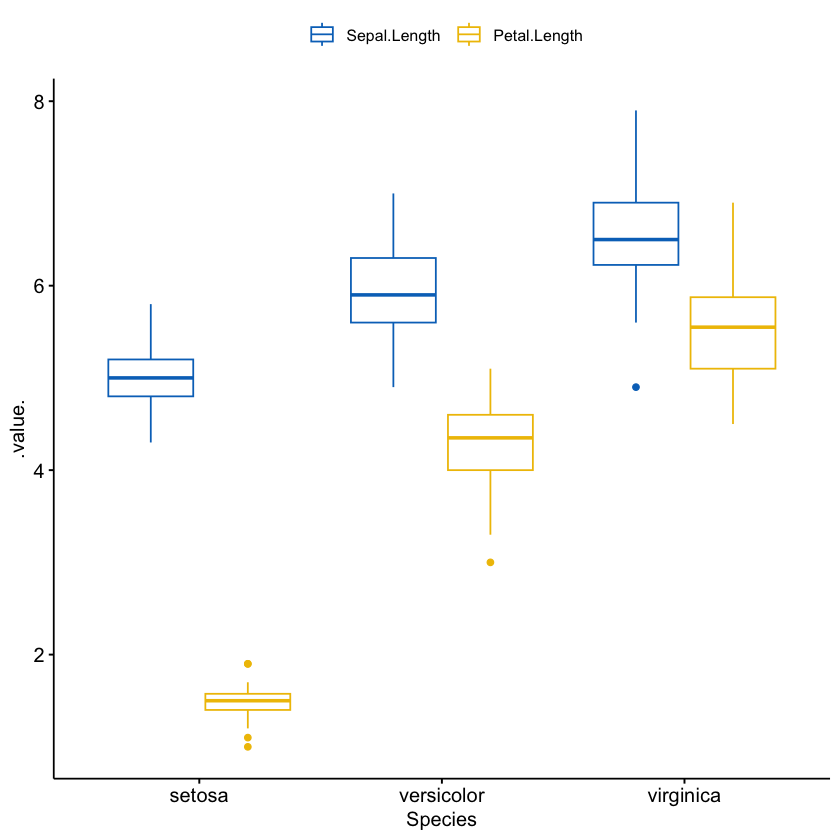

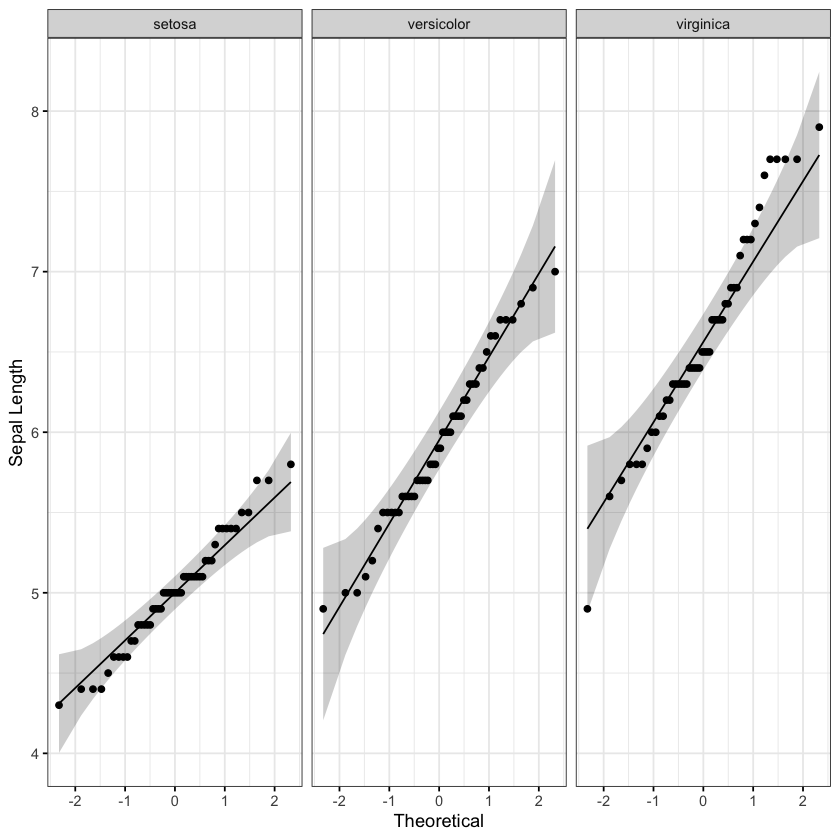

statistic,p.value
<dbl>,<dbl>
0.994613,0.8551989


var1,var2,cor,statistic,p,conf.low,conf.high,method
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Sepal.Length,Petal.Length,0.87,21.64602,1.04e-47,0.8270363,0.905508,Pearson


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



Species   
1 setosa    
2 versicolor
3 virginica 
  plots                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

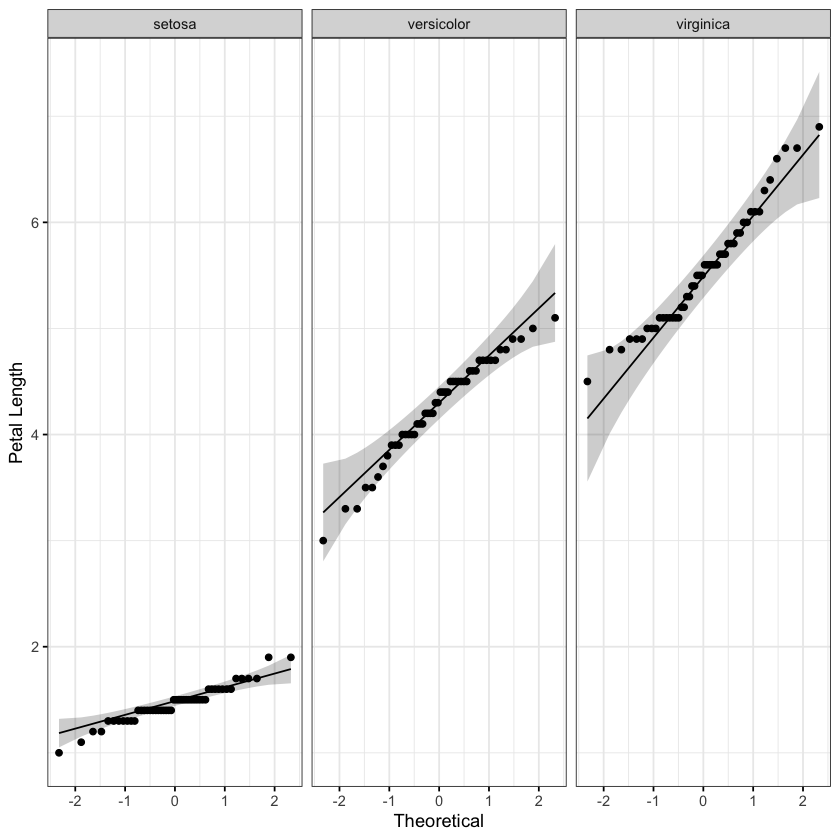

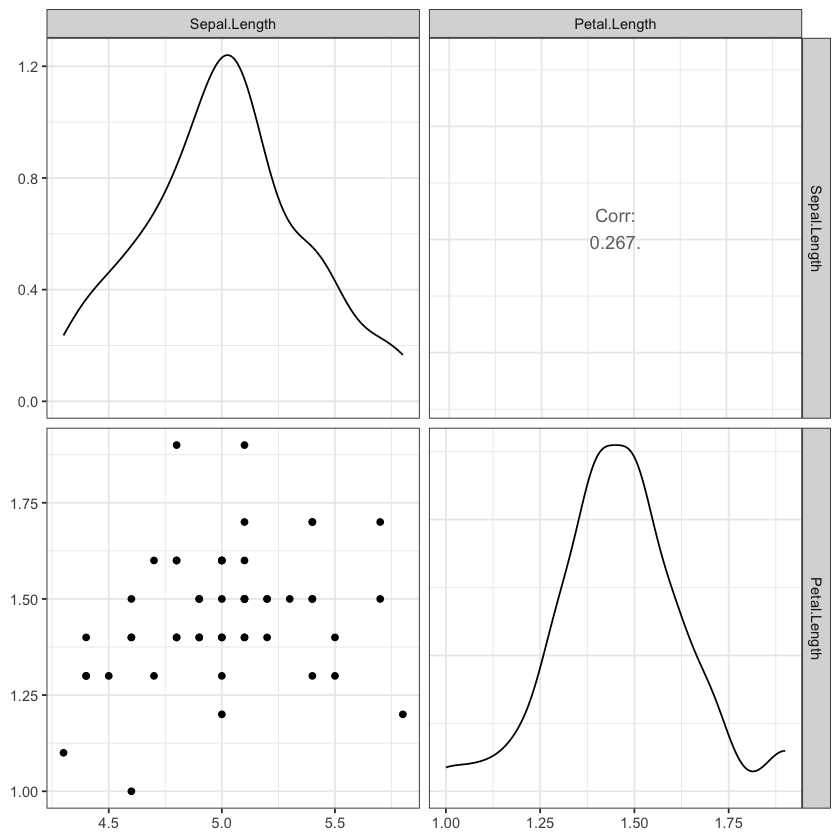

[[1]]

[[2]]

[[3]]


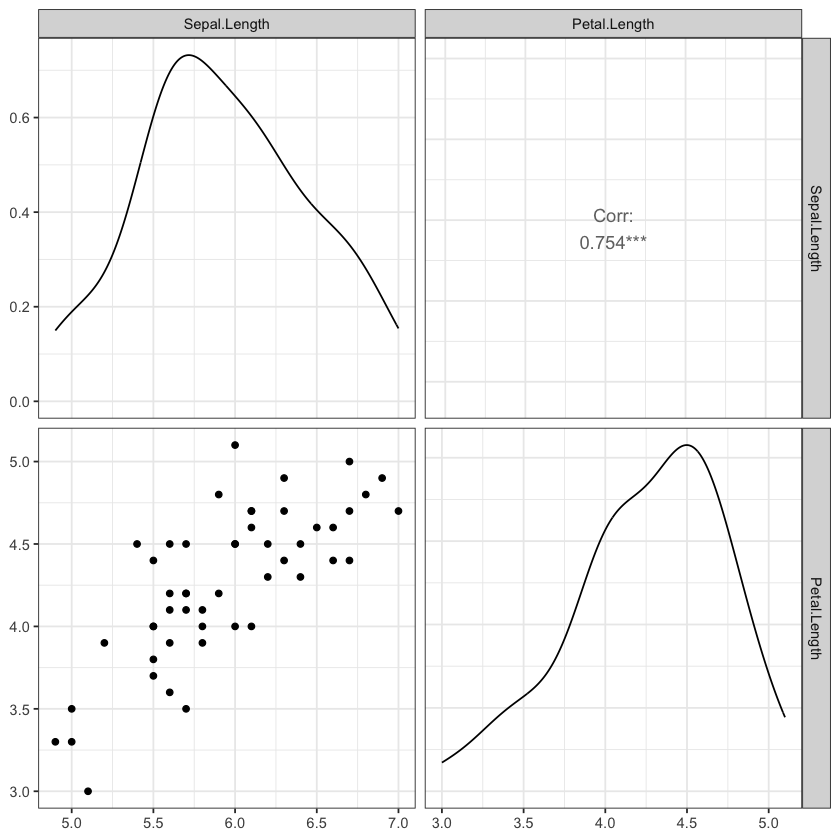

statistic,p.value,parameter,method
<dbl>,<dbl>,<dbl>,<chr>
58.37556,9.616505e-11,6,Box's M-test for Homogeneity of Covariance Matrices


variable,df1,df2,statistic,p
<chr>,<int>,<int>,<dbl>,<dbl>
Petal.Length,2,147,19.48034,3.128757e-08
Sepal.Length,2,147,6.35272,2.258528e-03



Type II MANOVA Tests:

Sum of squares and products for error:
             Sepal.Length Petal.Length
Sepal.Length      38.9562      24.6246
Petal.Length      24.6246      27.2226

------------------------------------------
 
Term: Species 

Sum of squares and products for the hypothesis:
             Sepal.Length Petal.Length
Sepal.Length     63.21213     165.2484
Petal.Length    165.24840     437.1028

Multivariate Tests: Species
                 Df test stat  approx F num Df den Df     Pr(>F)    
Pillai            2  0.988501   71.8288      4    294 < 2.22e-16 ***
Wilks             2  0.039878  292.5565      4    292 < 2.22e-16 ***
Hotelling-Lawley  2 23.364650  846.9686      4    290 < 2.22e-16 ***
Roy               2 23.334153 1715.0602      2    147 < 2.22e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Type II MANOVA Tests: Pillai test statistic
        Df test stat approx F num Df den Df    Pr(>F)    
Species  2    0.9885   71.829      4    294 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

,variable,.y.,n,statistic,DFn,DFd,p,method
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Petal.Length,value,150,1828.09,2,78.07296,2.69e-66,Welch ANOVA
2,Sepal.Length,value,150,138.91,2,92.21115,1.51e-28,Welch ANOVA


,variable,.y.,n,statistic,df,p,method
,<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,<chr>
1,Petal.Length,value,150,130.41105,2,4.80e-29,Kruskal-Wallis
2,Sepal.Length,value,150,96.93744,2,8.92e-22,Kruskal-Wallis


,variable,Effect,DFn,DFd,F,p,p<.05,ges
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,Petal.Length,Species,2,147,1180.161,2.86e-91,*,0.941
2,Sepal.Length,Species,2,147,119.265,1.67e-31,*,0.619


variables,.y.,group1,group2,p.adj,p.adj.signif
<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
Petal.Length,value,setosa,versicolor,1.85e-11,****
Petal.Length,value,setosa,virginica,1.68e-11,****
Petal.Length,value,versicolor,virginica,4.45e-10,****
Sepal.Length,value,setosa,versicolor,2.86e-10,****
Sepal.Length,value,setosa,virginica,0.00e+00,****
Sepal.Length,value,versicolor,virginica,5.58e-07,****


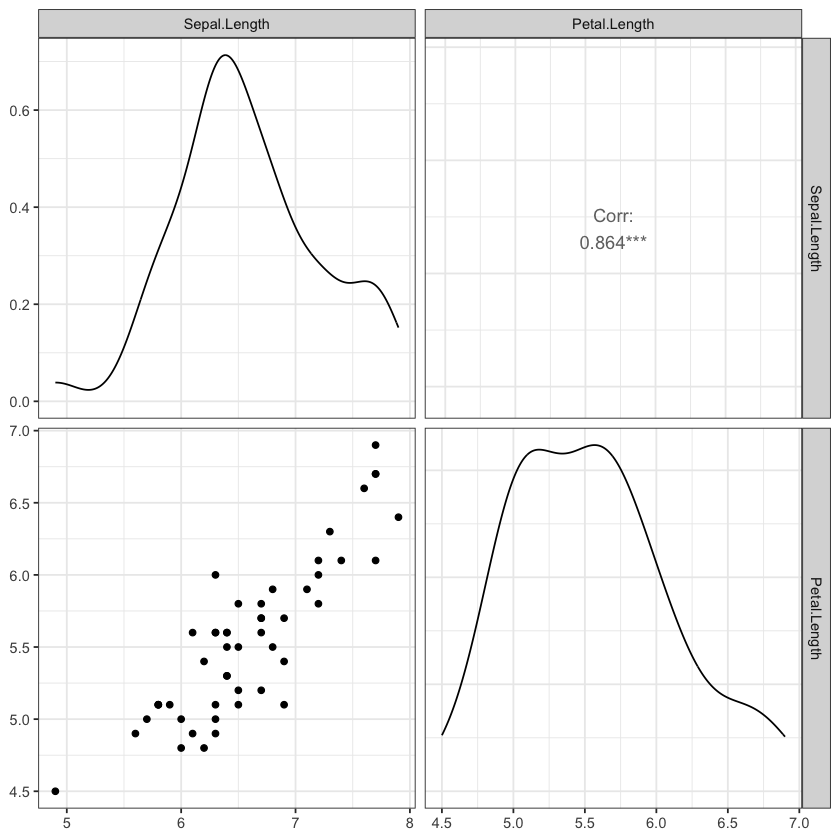

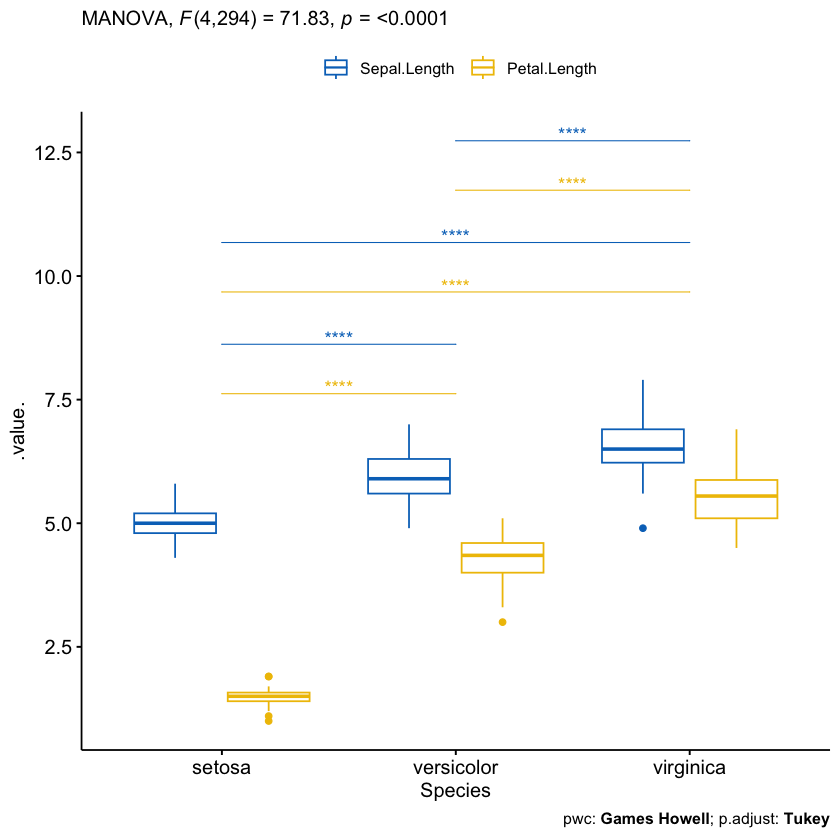

In [12]:
library(tidyverse)# data manipulation and visualization
library(ggpubr)#easy pipe-friendly statistical analyses
library(rstatix)#easy pipe-friendly statistical analyses
library(car) # MANOVA analyses
library(broom)# printing a nice summary of statistical tests as data frames
##e’ll use the built-in R dataset iris. Select columns of interest:

iris2 <- iris %>%
  select(Sepal.Length, Petal.Length, Species) %>%
  add_column(id = 1:nrow(iris), .before = 1)
head(iris2)
dim(iris2)
##Visualization
ggboxplot(
  iris2, x = "Species", y = c("Sepal.Length", "Petal.Length"), 
  merge = TRUE, palette = "jco"
)
##Summary statistics
iris2 %>%
  group_by(Species) %>%
  get_summary_stats(Sepal.Length, Petal.Length, type = "mean_sd")

##Multivariate normality. mshapiro_test( ) (package: rstatix )
##Check sample size assumption
iris2 %>%
  group_by(Species) %>%
  summarise(N = n())
##Identify univariate outliers :identify_outliers() [rstatix package].
iris2 %>%
  group_by(Species) %>%
  identify_outliers(Sepal.Length)
iris2 %>%
  group_by(Species) %>%
  identify_outliers(Petal.Length)
#===>There were no univariate extreme outliers in the Sepal.Length and Petal.length variable, as assessed by box plot methods.

##Detect multivariate outliers: mahalanobis_distance() [rstatix package]
### Compute distance by groups and filter outliers
# Use -id to omit the id column in the computation
iris2 %>%group_by(Species) %>%mahalanobis_distance(-id) %>%
filter(is.outlier == TRUE) %>% as.data.frame()
#===>There were no multivariate outliers in the data, 
#===> as assessed by Mahalanobis distance (p > 0.001).

##Check univariate normality assumption : Shapiro-Wilk test
iris2 %>%
  group_by(Species) %>%
  shapiro_test(Sepal.Length, Petal.Length) %>%
  arrange(variable)
##===>Sepal.Length and Petal.length were normally distributed for each Species groups,
##==>as assessed by Shapiro-Wilk’s test (p > 0.05).
##Q Q plot
# QQ plot of Sepal.Length ( đài hoa)
ggqqplot(iris2, "Sepal.Length", facet.by = "Species",
         ylab = "Sepal Length", ggtheme = theme_bw())

# QQ plot of Petal.Length (cánh hoa)
ggqqplot(iris2, "Petal.Length", facet.by = "Species",
         ylab = "Petal Length", ggtheme = theme_bw())

####Multivariate normality. mshapiro_test( ) (package: rstatix )
##Multivariate normality
iris2 %>%
  select(Sepal.Length, Petal.Length) %>%
  mshapiro_test()
#===>The test is not significant (p > 0.05), so we can assume multivariate normality.

##dentify multicollinearity : cor_test() [rstatix package]
#Ideally the correlation between the outcome variables should be moderate, not too high. A correlation above 0.9 is an indication of multicollinearity,
#which is problematic for MANOVA.
iris2 %>% cor_test(Sepal.Length, Petal.Length)
##===>There was no multicollinearity, as assessed by Pearson correlation (r = 0.87, p < 0.0001).

##Check linearity assumption
# Create a scatterplot matrix by group
library(GGally)
results <- iris2 %>%
  select(Sepal.Length, Petal.Length, Species) %>%
  group_by(Species) %>%
  doo(~ggpairs(.) + theme_bw(), result = "plots")
results
# Show the plots
results$plots
#===>There was a linear relationship between Sepal.Length and Petal.Length in each Species group, as assessed by scatter plot.

##Check the homogeneity of covariances assumption
#using Box’s M-test implemented in the rstatix package
box_m(iris2[, c("Sepal.Length", "Petal.Length")], iris2$Species)
#===>The test is statistically significant (i.e., p < 0.001), so the data have violated the assumption of homogeneity of variance-covariance matrices.
## Note that, if you have balanced design (i.e., groups with similar sizes), you don’t need to worry too much about violation of the homogeneity of variances-covariance matrices and you can continue your analysis.
##However, having an unbalanced design is problematic. Possible solutions include: 1) transforming the dependent variables; 2) running the test anyway, but using Pillai’s multivariate statistic instead of Wilks’ statistic.

##Check the homogneity of variance assumption: levene_test() [rstatix package].
iris2 %>% 
  gather(key = "variable", value = "value", Sepal.Length, Petal.Length) %>%
  group_by(variable) %>%
  levene_test(value ~ Species)
##===>The Levene’s test is significant (p < 0.05), so there was no homogeneity of variances.
#Note that, if you do not have homogeneity of variances, you can try to transform the outcome (dependent) variable to correct for the unequal variances.
#Alternatively, you can continue, but accept a lower level of statistical significance (alpha level) for your MANOVA result. Additionally, any follow-up univariate ANOVAs will need to be corrected for this violation (i.e., you will need to use different post-hoc tests).

#Computation : Manova() function [car package].

mod <- Manova(lm(cbind(Sepal.Length, Petal.Length) ~ Species, data=iris2 ))
summary(mod)
###
model <- lm(cbind(Sepal.Length, Petal.Length) ~ Species, iris2)
Manova(model, test.statistic = "Pillai")
#===> There was a statistically significant difference between the Species on the combined dependent variables (Sepal.Length and Petal.Length), F(4, 294) = 71.829, p < 0.0001.

##Post-hoc tests
library(rstatix)
# Group the data by variable
grouped.data <- iris2 %>%
  gather(key = "variable", value = "value", Sepal.Length, Petal.Length) %>%
  group_by(variable)

# Do welch one way anova test
grouped.data %>% welch_anova_test(value ~ Species)
# or do Kruskal-Wallis test
grouped.data %>% kruskal_test(value ~ Species)
# or use aov()
grouped.data %>% anova_test(value ~ Species)
#===>There was a statistically significant difference in Sepal.Length (F(2, 147) = 119, p < 0.0001 )
#and Petal.Length (F(2, 147) = 1180, p < 0.0001 ) between iris Species.

##Compute multiple pairwise comparisons
#The R functions tukey_hsd() [rstatix package] can be used to compute Tukey post-hoc tests if the homogeneity of variance assumption is met.
#If you had violated the assumption of homogeneity of variances, as in our example, you might prefer to run a Games-Howell post-hoc test. It’s also possible to use the function pairwise_t_test() [rstatix] with the option pool.sd = FALSE and var.equal = FALSE .

pwc <- iris2 %>%
  gather(key = "variables", value = "value", Sepal.Length, Petal.Length) %>%
  group_by(variables) %>%
  games_howell_test(value ~ Species) %>%
  select(-estimate, -conf.low, -conf.high) # Remove details
pwc
#===>All pairwise comparisons were significant for each of the outcome variable (Sepal.Length and Petal.Length).

#####Report
#A one-way multivariate analysis of variance was performed to determine the effect of iris Species on Sepal.Length and Petal.Length. There are three different species: setosa, versicolor and virginica.

#There was a statistically significant difference between the Species on the combined dependent variables (Sepal.Length and Petal.Length), F(4, 294) = 71.829, p < 0.0001.

#Follow-up univariate ANOVAs, using a Bonferroni adjusted alpha level of 0.025, showed that there was a statistically significant difference in Sepal.Length (F(2, 147) = 119, p < 0.0001 ) and Petal.Length (F(2, 147) = 1180, p < 0.0001 ) between iris Species.

#All pairwise comparisons between groups were significant for each of the outcome variable (Sepal.Length and Petal.Length).
# Visualization: box plots with p-values
pwc <- pwc %>% add_xy_position(x = "Species")
test.label <- create_test_label(
  description = "MANOVA", statistic.text = quote(italic("F")),
  statistic = 71.83, p= "<0.0001", parameter = "4,294",
  type = "expression", detailed = TRUE
)
ggboxplot(
  iris2, x = "Species", y = c("Sepal.Length", "Petal.Length"), 
  merge = TRUE, palette = "jco"
) + 
  stat_pvalue_manual(
    pwc, hide.ns = TRUE, tip.length = 0, 
    step.increase = 0.1, step.group.by = "variables",
    color = "variables"
  ) +
  labs(
    subtitle = test.label,
    caption = get_pwc_label(pwc, type = "expression")
  )

